<a href="https://colab.research.google.com/github/muhsinzubair/Data-Science-Projects/blob/main/Delhivery_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Delhivery Case Study**

**Business Problem:**

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181 -O delhivery.csv

--2023-09-18 05:17:39--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 99.84.178.93, 99.84.178.226, 99.84.178.172, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|99.84.178.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55617130 (53M) [text/plain]
Saving to: ‘delhivery.csv’

delhivery.csv       100%[===================>]  53.04M   190MB/s    in 0.3s    

2023-09-18 05:17:39 (190 MB/s) - ‘delhivery.csv’ saved [55617130/55617130]



In [ ]:
df = pd.read_csv('delhivery.csv')

**Column Descriptions:**

**data:** tells whether the data is testing or training data

**trip_creation_time:** Timestamp of trip creation

**route_schedule_uuid:** Unique Id for a particular route schedule

**route_type:** Transportation type

**FTL – Full Truck Load:** FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way

**Carting:** Handling system consisting of small vehicles (carts)

**trip_uuid:** Unique ID given to a particular trip (A trip may include different source and destination centers)

**source_center:** Source ID of trip origin

**source_name:** Source Name of trip origin

**destination_center:** Destination ID

**destination_name:** Destination Name

**od_start_time:** Trip start time

**od_end_time:** Trip end time

**start_scan_to_end_scan:** Time taken to deliver from source to destination

**is_cutoff:** Unknown field

**cutoff_factor:** Unknown field

**cutoff_timestamp:** Unknown field

**actual_distance_to_destination:** Distance in Kms between source and destination warehouse

**actual_time:** Actual time taken to complete the delivery (Cumulative)

**osrm_time:** An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)

**osrm_distance:** An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)

**factor:** Unknown field

**segment_actual_time:** This is a segment time. Time taken by the subset of the package delivery

**segment_osrm_time:** This is the OSRM segment time. Time taken by the subset of the package delivery

**segment_osrm_distance:** This is the OSRM distance. Distance covered by subset of the package delivery

**segment_factor:** Unknown field

In [ ]:
pd.set_option('display.max_columns',None)
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,9,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,18,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,27,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,36,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,False,43,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


In [ ]:
#Rows and columns:
df.shape

(144867, 24)

**Merging rown based on trip column:**

In [ ]:
grp_trip = df.groupby('trip_uuid')

In [ ]:
#Total number of distinct trips:
print('total number of trips: ',len(grp_trip))

total number of trips:  14817


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

**Basic Statistics of numerical columns:**

In [ ]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


**Detecting missing values and handling it:**

In [ ]:
pd.isna(df).sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [ ]:
#imputing missing values in source_name column with 'other'
df['source_name'] = df['source_name'].fillna('Other')

In [ ]:
#dropping remaining missing values because they are less than even 1 percent of the data
df = df.dropna(axis=0)

In [ ]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

**Feature Extraction:**

In [ ]:
#Extracting city, place, source code and state from 'source name' column:

df = df.join(df['source_name'].str.split('_',expand=True,n=2))
df.rename({0:"source_city",1:"source_place"},inplace=True,axis=1)
df = df.join(df[2].str.split(' ',expand=True,n=1))
df.rename({0:"source_code",1:"source_State"},axis=1,inplace=True)
df.drop(['source_name',2],axis=1,inplace=True)

In [ ]:
#Extracting city, place, destination code and state from 'destination name' column:

df[['dest_city','dest_place','extra']] = df['destination_name'].str.split('_',expand=True,n=2)
df[['dest_code','dest_state']] = df['extra'].str.split(' ',expand=True,n=1)
df.drop(['destination_name','extra'],axis=1,inplace=True)

In [ ]:
#Converting datetime columns to datetime datatype:

df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

In [ ]:
#Extracting day, month, year and hour from 'trip_creation_time' column:

df['trip_crt_day'] = df['trip_creation_time'].apply(lambda x: x.day)
df['trip_crt_month'] = df['trip_creation_time'].apply(lambda x: x.month)
df['trip_crt_year'] = df['trip_creation_time'].apply(lambda x: x.year)
df['trip_crt_hour'] = df['trip_creation_time'].apply(lambda x: x.hour)

In [ ]:
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,source_State,dest_city,dest_place,dest_code,dest_state,trip_crt_day,trip_crt_month,trip_crt_year,trip_crt_hour
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Anand,VUNagar,DC,(Gujarat),Khambhat,MotvdDPP,D,(Gujarat),20,9,2018,2
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Anand,VUNagar,DC,(Gujarat),Khambhat,MotvdDPP,D,(Gujarat),20,9,2018,2
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Anand,VUNagar,DC,(Gujarat),Khambhat,MotvdDPP,D,(Gujarat),20,9,2018,2
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Anand,VUNagar,DC,(Gujarat),Khambhat,MotvdDPP,D,(Gujarat),20,9,2018,2
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Anand,VUNagar,DC,(Gujarat),Khambhat,MotvdDPP,D,(Gujarat),20,9,2018,2
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,IND388320AAA,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,9,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636,Khambhat,MotvdDPP,D,(Gujarat),Anand,Vaghasi,IP,(Gujarat),20,9,2018,2
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,IND388320AAA,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,18,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667,Khambhat,MotvdDPP,D,(Gujarat),Anand,Vaghasi,IP,(Gujarat),20,9,2018,2
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,IND388320AAA,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,27,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091,Khambhat,MotvdDPP,D,(Gujarat),Anand,Vaghasi,IP,(Gujarat),20,9,2018,2
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,IND388320AAA,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,36,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000,Khambhat,MotvdDPP,D,(Gujarat),Anand,Vaghasi,IP,(Gujarat),20,9,2018,2
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,IND388320AAA,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,False,43,201

**Relation Between Features:**

In [ ]:
df['od_totaltime'] = (df['od_end_time']-df['od_start_time']).apply(lambda x: round(x.total_seconds()/60,1))

Od_totaltime vs start_scan_to_end_scan:

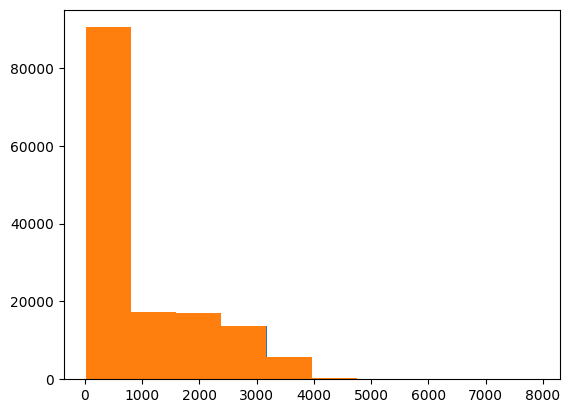

In [ ]:
plt.hist(df['od_totaltime'])
plt.hist(df['start_scan_to_end_scan'])
plt.show()

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
ttest_ind(df['od_totaltime'],df['start_scan_to_end_scan'],alternative='two-sided')

TtestResult(statistic=0.12852674408002027, pvalue=0.8977322243913324, df=289210.0)

actual_time vs osrm_time:

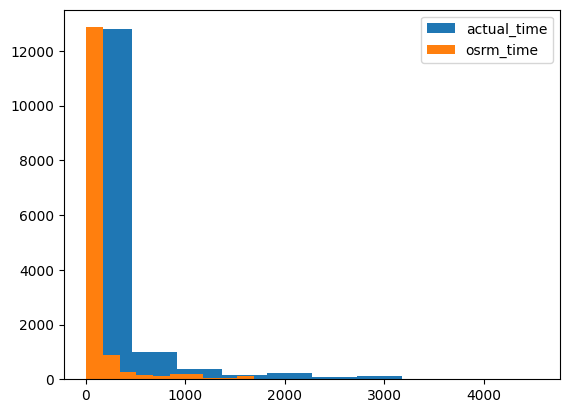

In [ ]:
x1 = grp_trip.actual_time.max()
x2 = grp_trip.osrm_time.max()
plt.hist(x1,label='actual_time')
plt.hist(x2,label='osrm_time')
plt.legend()
plt.show()

In [ ]:
_,pvalue = ttest_ind(x1,x2)
if pvalue < 0.05:
  print('pvalue:',pvalue,'p-value is less than 0.05, there is signifant relation between two variables')
else:
  print('p-value:',pvalue,'p-value is greater, no relation')

pvalue: 1.031233484916594e-265 p-value is less than 0.05, there is signifant relation between two variables


actual_time vs segment_actual_time:

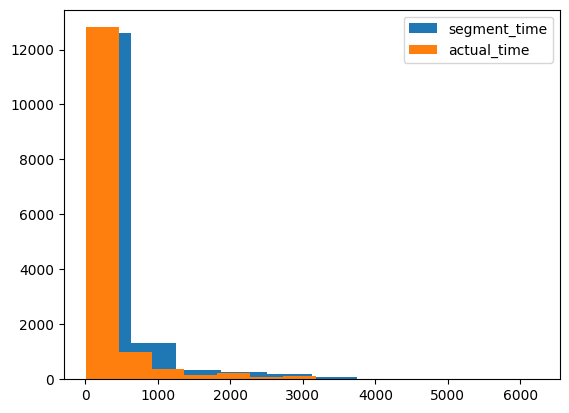

In [ ]:
x1 = grp_trip.actual_time.max()
x2 = grp_trip.segment_actual_time.sum()

plt.hist(x2,label='segment_time')
plt.hist(x1,label='actual_time')
plt.legend()
plt.show()

In [ ]:
_,pvalue = ttest_ind(x1,x2)
if pvalue < 0.05:
  print('pvalue:',pvalue,'p-value is less than 0.05, there is signifant relation between two variables')
else:
  print('p-value:',pvalue,'p-value is greater, no relation')

pvalue: 9.417815251922895e-36 p-value is less than 0.05, there is signifant relation between two variables


osrm_time vs segment_osrm_time:

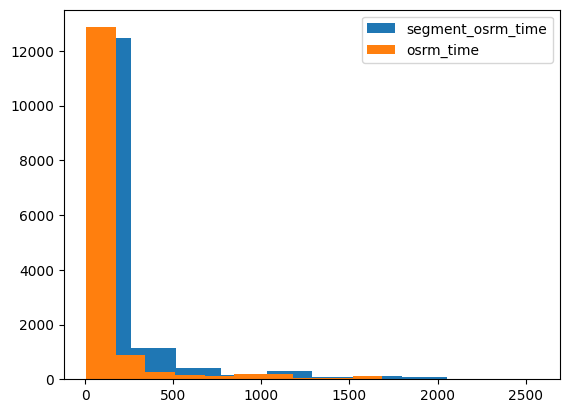

In [ ]:
x1 = grp_trip.osrm_time.max()
x2 = grp_trip.segment_osrm_time.sum()

plt.hist(x2,label='segment_osrm_time')
plt.hist(x1,label='osrm_time')
plt.legend()
plt.show()

In [ ]:
_,pvalue = ttest_ind(x1,x2)
if pvalue < 0.05:
  print('pvalue:',pvalue,'p-value is less than 0.05, there is signifant relation between two variables')
else:
  print('p-value:',pvalue,'p-value is greater, no relation')

pvalue: 3.619072013555336e-74 p-value is less than 0.05, there is signifant relation between two variables


osrm_distance vs segment_osrm_distance

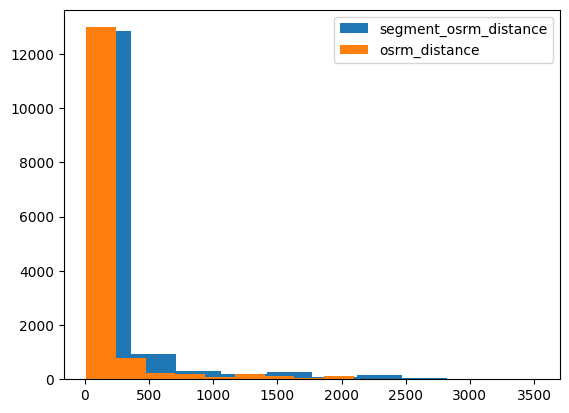

In [ ]:
x1 = grp_trip.osrm_distance.max()
x2 = grp_trip.segment_osrm_distance.sum()

plt.hist(x2,label='segment_osrm_distance')
plt.hist(x1,label='osrm_distance')
plt.legend()
plt.show()

In [ ]:
_,pvalue = ttest_ind(x1,x2)
if pvalue < 0.05:
  print('pvalue:',pvalue,'p-value is less than 0.05, there is signifant relation between two variables')
else:
  print('p-value:',pvalue,'p-value is greater, no relation')

pvalue: 4.6528686685002756e-54 p-value is less than 0.05, there is signifant relation between two variables


**Graphs and Plots:**

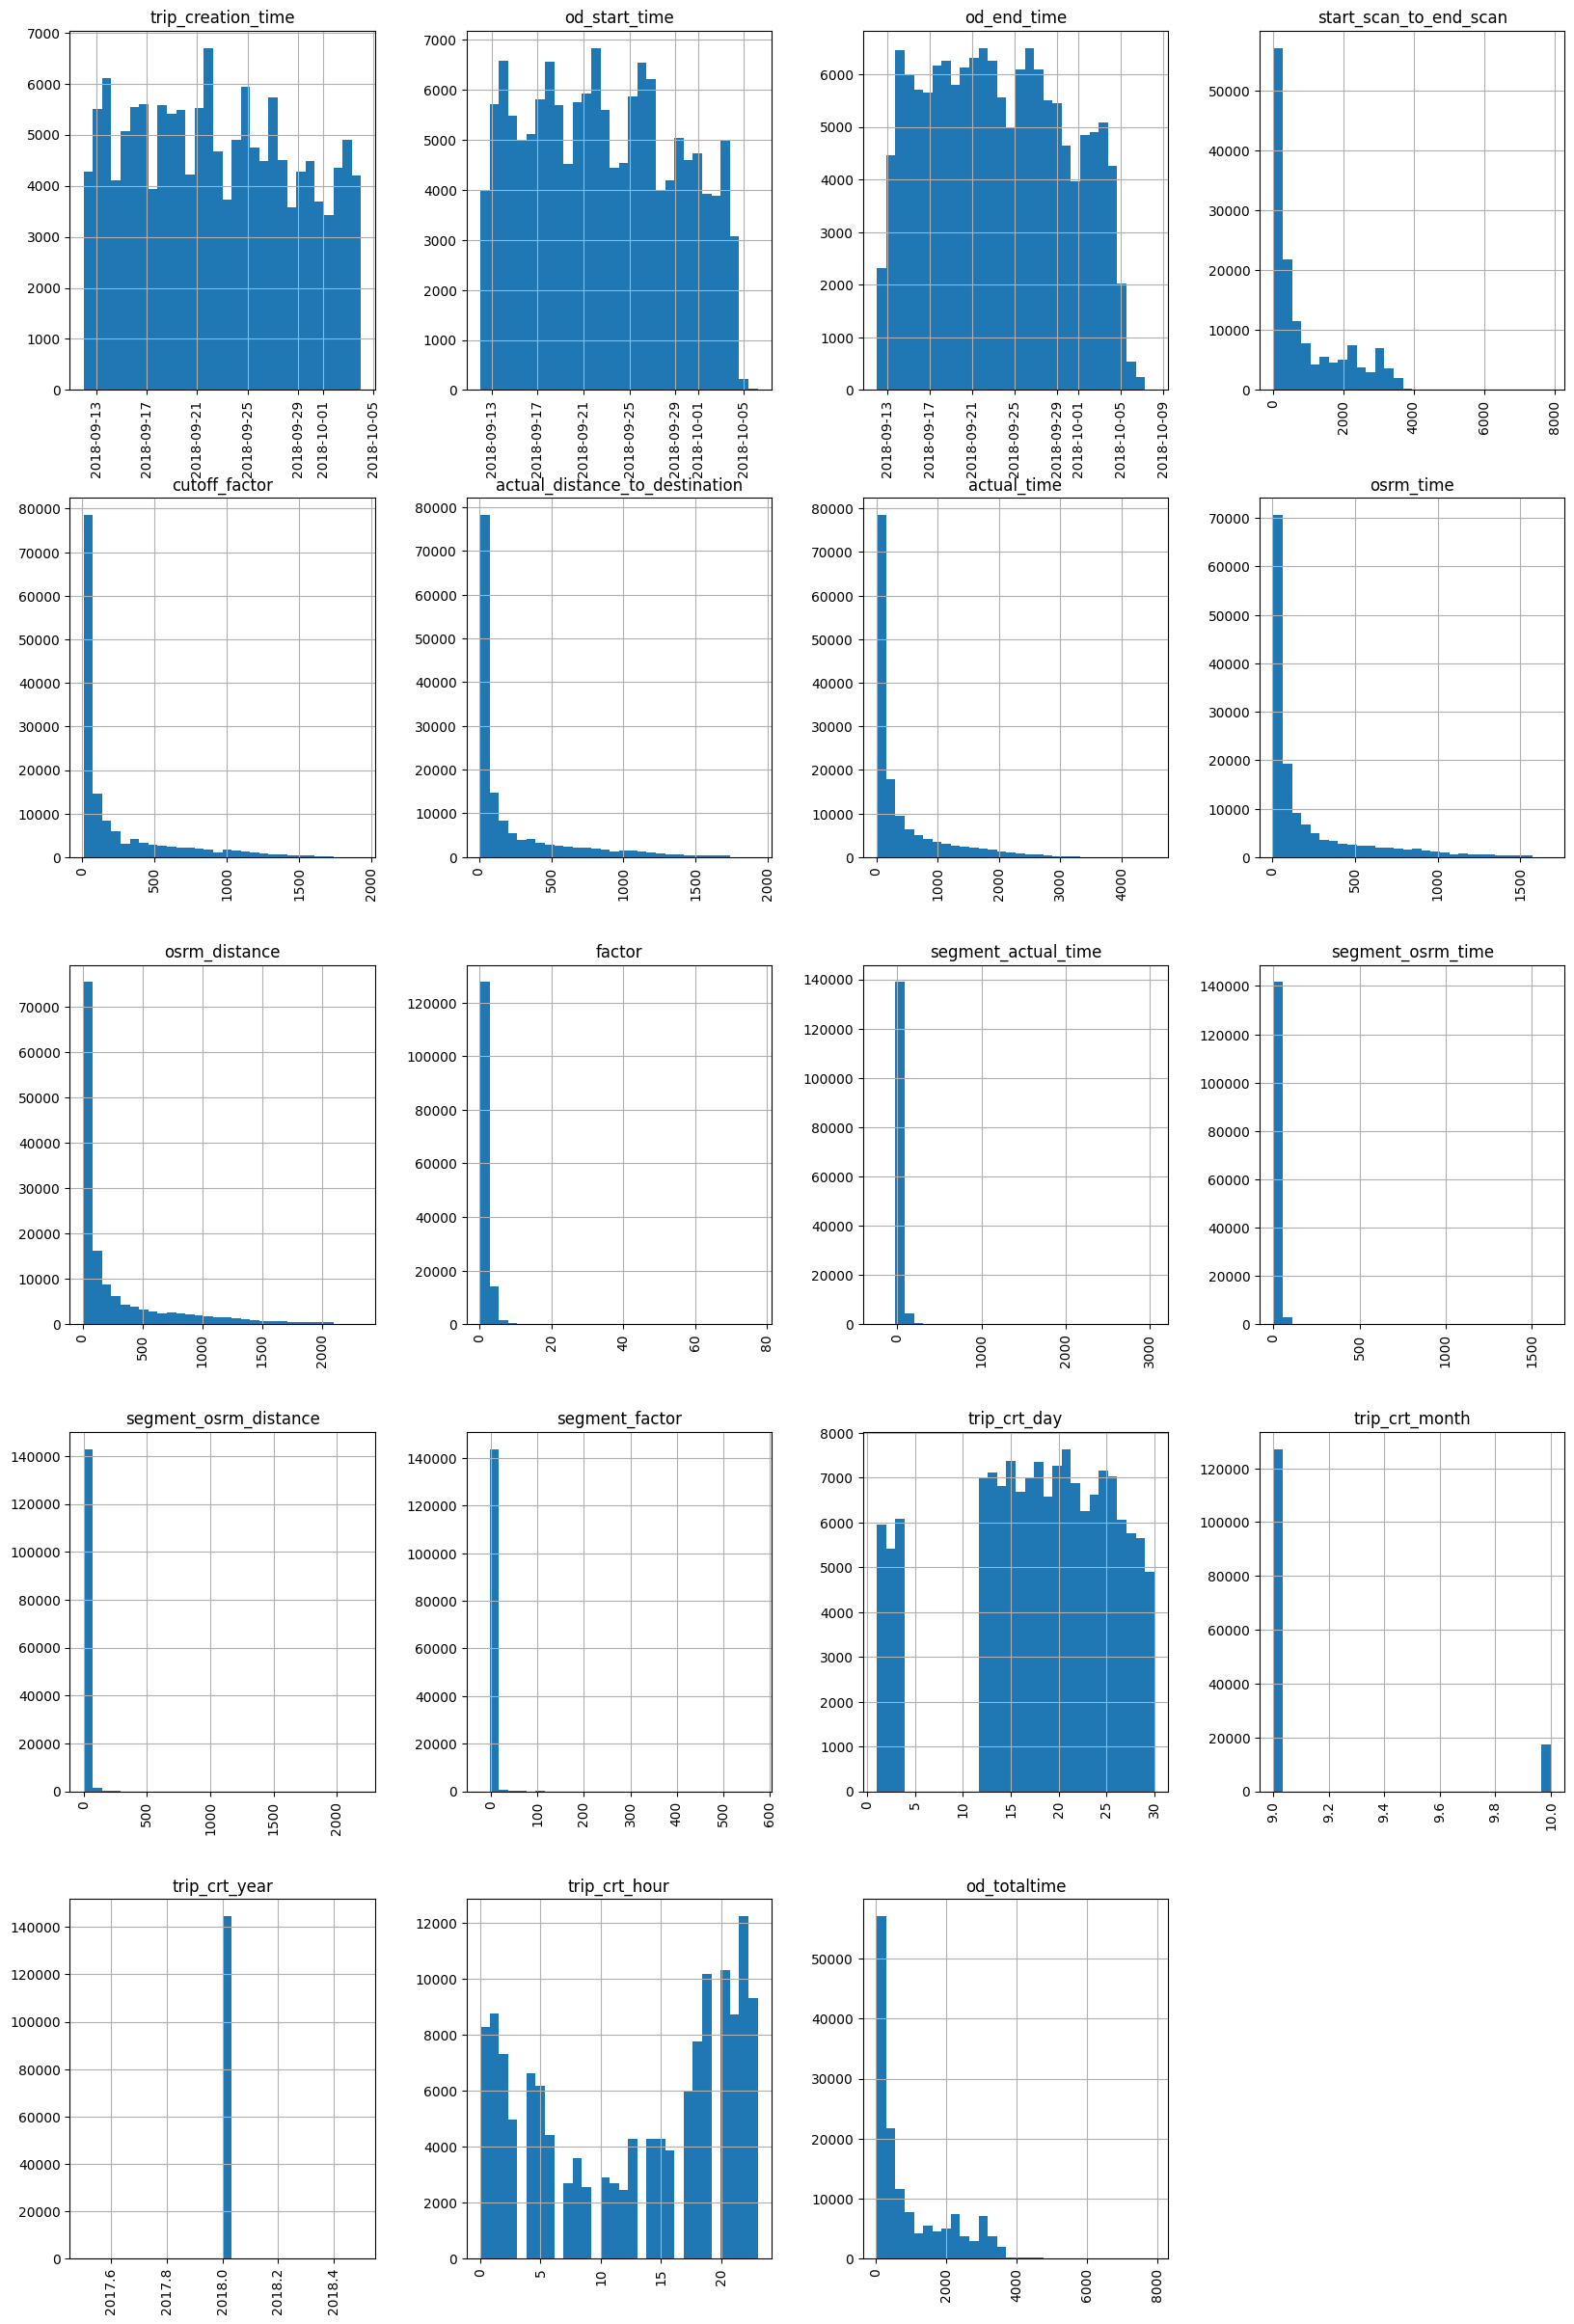

In [ ]:
df.hist(bins=30, figsize=(20, 30),xrot=90)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='data', ylabel='count'>

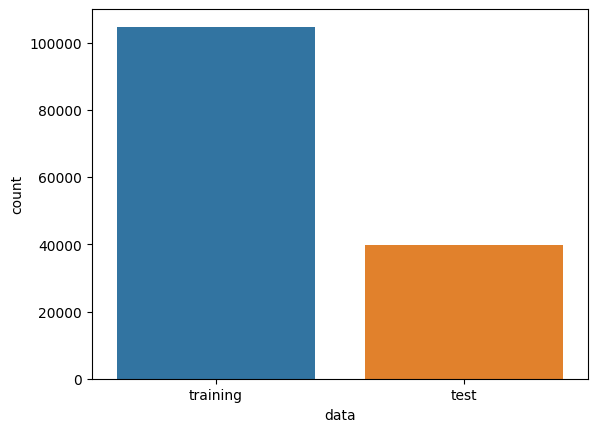

In [ ]:
#Training data vs Test data:

sns.countplot(x=df['data'])

<function matplotlib.pyplot.show(close=None, block=None)>

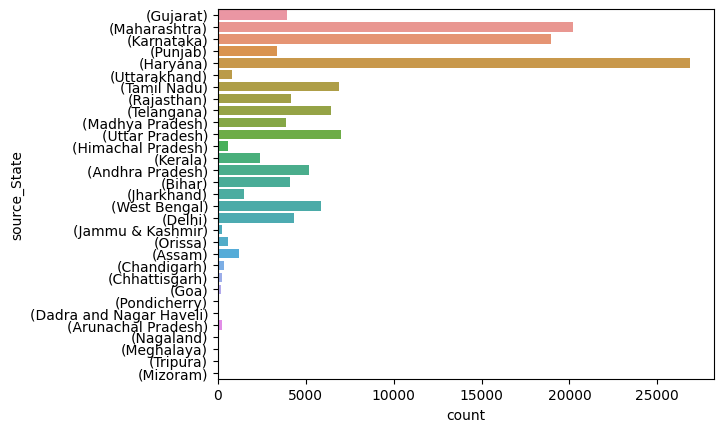

In [ ]:
#Plotting all source states according to the number of deliveries:

sns.countplot(y=df['source_State'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

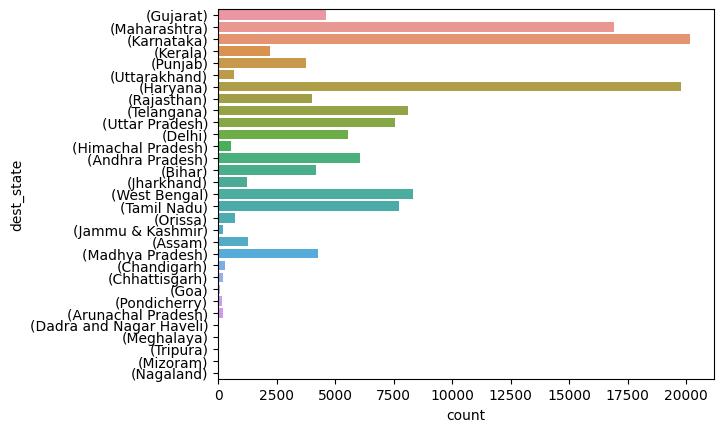

In [ ]:
#Plotting all destination states according to total number of deliveries:

sns.countplot(y=df['dest_state'])
plt.show

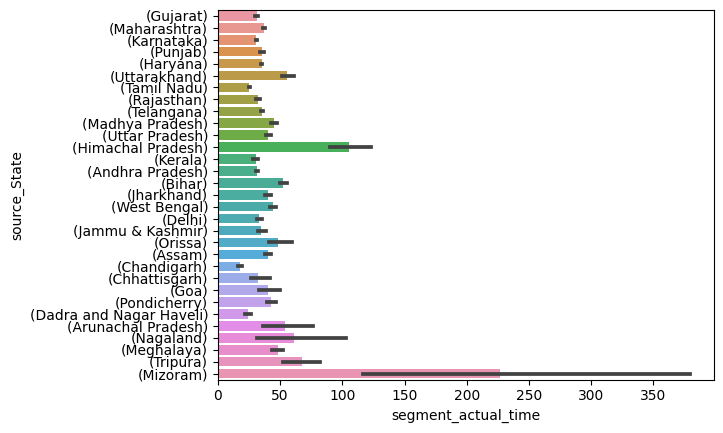

In [ ]:
#Plotting source state according to the time taken for deliveries:

x = df['source_State']
y = df['segment_actual_time']
sns.barplot(x=y,y=x)
#plt.xticks(rotation=90)
plt.show()

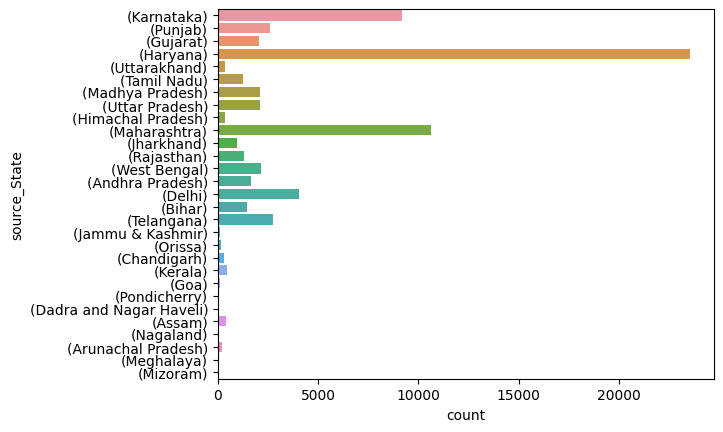

In [ ]:
#plotting all source states where delivery is done to another state:

sns.countplot(y=df.query('source_State != dest_state')['source_State'])
plt.show()

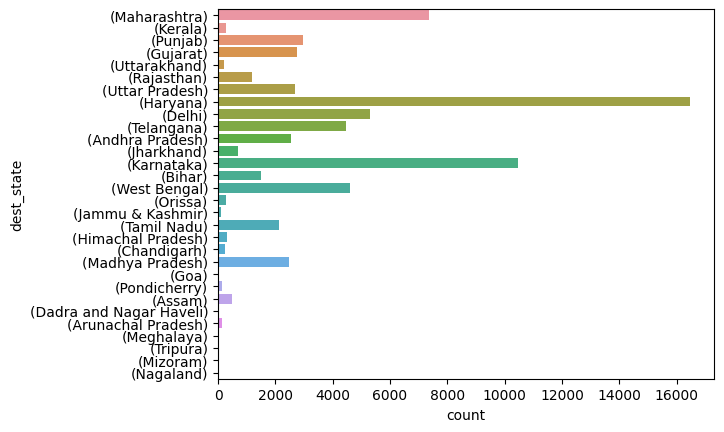

In [ ]:
#plotting all destination states where delivery is done from another state:

sns.countplot(y=df.query('source_State != dest_state')['dest_state'])
plt.show()

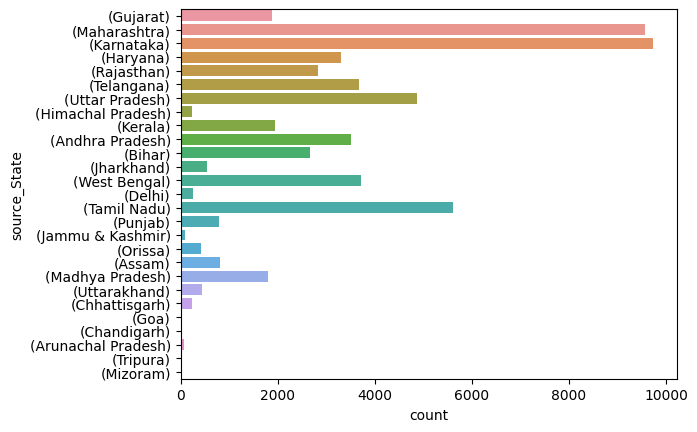

In [ ]:
#plotting all states according to local deliveries:

sns.countplot(y=df.query('source_State == dest_state')['source_State'])
plt.show()

In [ ]:
y=df['source_city'].value_counts().sort_values(ascending=False).head(5).index

<Axes: xlabel='count', ylabel='source_city'>

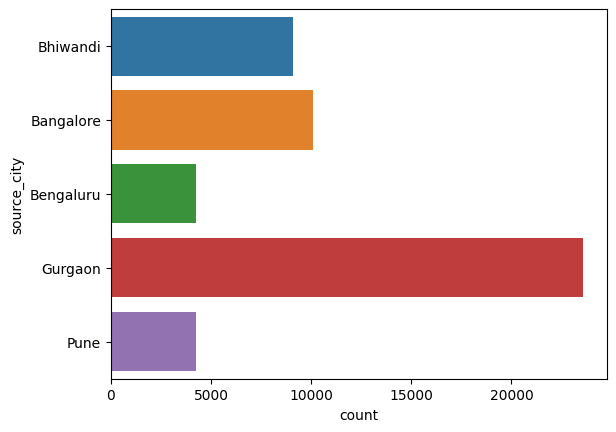

In [ ]:
#Busiest cities:

sns.countplot(y=df[df['source_city'].isin(y)]['source_city'])

<Axes: xlabel='route_type', ylabel='count'>

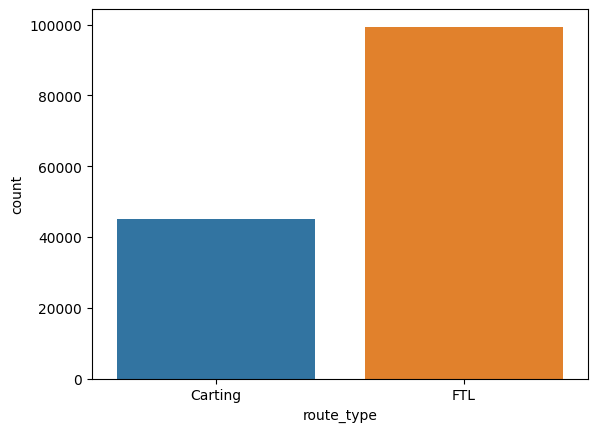

In [ ]:
#Carting vs FTL

sns.countplot(x=df['route_type'])

<Axes: xlabel='actual_distance_to_destination', ylabel='Count'>

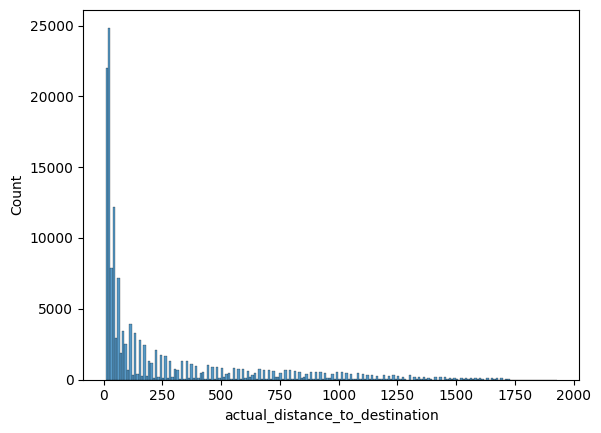

In [ ]:
#Plotting deliveries with respect to distance:

sns.histplot(x=df['actual_distance_to_destination'])

<Axes: xlabel='actual_distance_to_destination', ylabel='actual_time'>

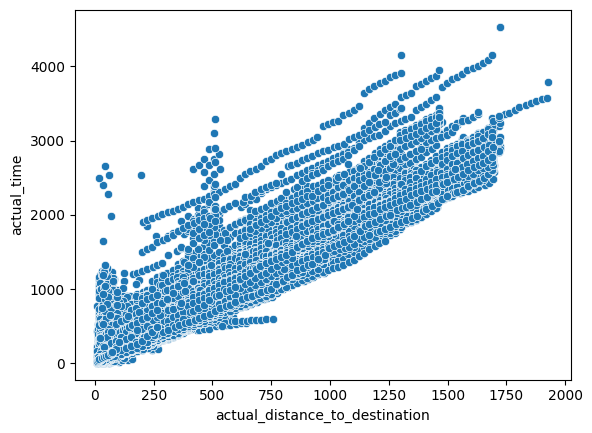

In [ ]:
#Actual Distance vs Actual time:

sns.scatterplot(x=df['actual_distance_to_destination'],y=df['actual_time'])

In [ ]:
df['time/distance'] = df['actual_time']/df['actual_distance_to_destination']

Minutes per km taken in different states:

In [ ]:
pd.DataFrame(df.groupby('source_State')['time/distance'].mean().sort_values().reset_index())

,source_State,time/distance
0,(Haryana),1.862666
1,(Chandigarh),1.890055
2,(Andhra Pradesh),1.934385
3,(Punjab),1.937317
4,(Tamil Nadu),2.014767
5,(Chhattisgarh),2.027727
6,(Gujarat),2.055127
7,(Madhya Pradesh),2.055745
8,(Telangana),2.075379
9,(Karnataka),2.085091


In [ ]:
df['start-crt_time'] =  (df['od_start_time']-df['trip_creation_time']).apply(lambda x: round(x.total_seconds()/60,1))

Time takes to start the trip after creating order in different states:

<Axes: xlabel='start-crt_time', ylabel='source_State'>

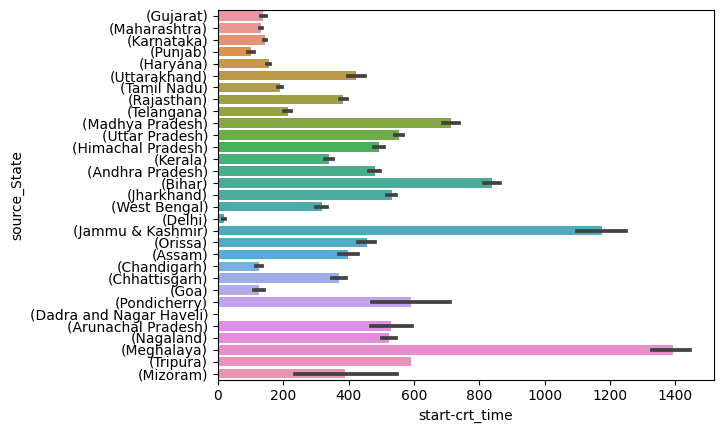

In [ ]:
sns.barplot(y=df['source_State'],x=df['start-crt_time'])

<Axes: xlabel='start-crt_time', ylabel='dest_state'>

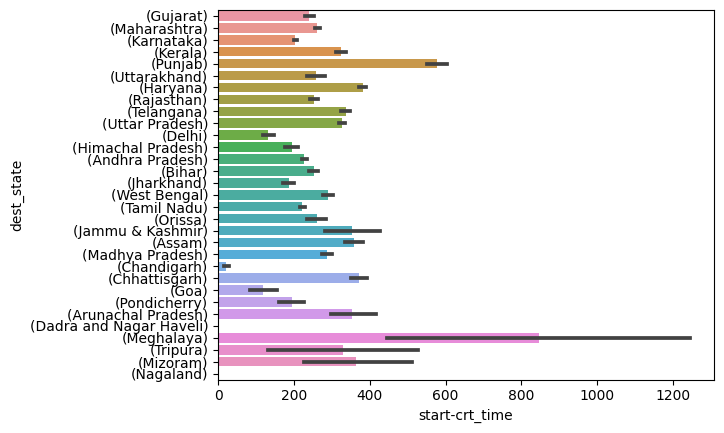

In [ ]:
sns.barplot(y=df['dest_state'],x=df['start-crt_time'])

**Preparing data for machine learning:**

Dropping reduntant columns:

In [ ]:
df['trip_crt_mnt'] = df['trip_creation_time'].apply(lambda x: x.minute)

In [ ]:
#Dropping datetime columns since we have extracted almost all useful features from those to separate numerical columns:

df.drop(['trip_creation_time','od_start_time','od_end_time'],axis=1,inplace=True)
df.drop('cutoff_timestamp',axis=1,inplace=True)

#Dropping columns which are unique identifiers and informations from those are irrelevant:

df.drop(['route_schedule_uuid','trip_uuid'],axis=1,inplace=True)
df.drop(['source_center','destination_center'],axis=1,inplace=True)

#Dropping "Od_totaltime" since it is same as 'start_scan_to_end_scan':

df.drop('od_totaltime',axis=1,inplace=True)

**Handling outliers:**

**Method: Detecting using IQR and handling by capping**

<Axes: xlabel='start_scan_to_end_scan'>

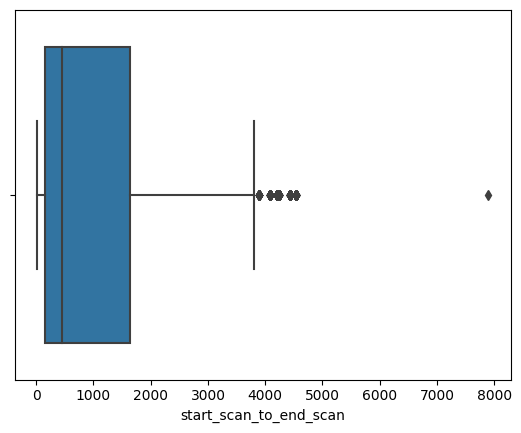

In [ ]:
# outliers in 'start_scan_to_end_scan' column:
sns.boxplot(x=df['start_scan_to_end_scan'])

In [ ]:
df['start_scan_to_end_scan'].describe()

count    144606.000000
mean        962.406131
std        1037.467265
min          20.000000
25%         161.000000
50%         450.000000
75%        1639.000000
max        7898.000000
Name: start_scan_to_end_scan, dtype: float64

In [ ]:
#Capping the outliers:

col = df['start_scan_to_end_scan']
q1 = np.percentile(col,25)
q3 = np.percentile(col,75)
iqr = q3 - q1
upper = q3 + 1.5 * iqr
col = np.where(col > upper,upper,col)

<Axes: >

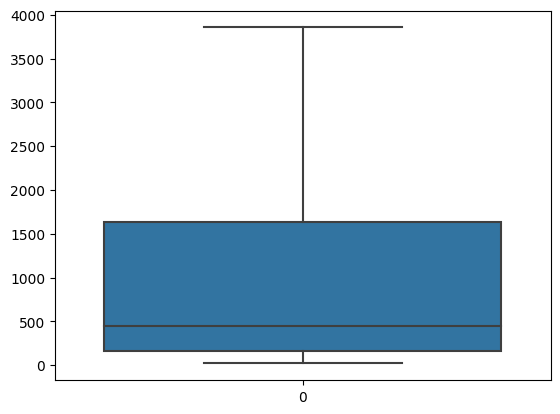

In [ ]:
#After removing the outliers:

sns.boxplot(col)

In [ ]:
df.columns[df.dtypes == 'float64']

Index(['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'factor',
       'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance',
       'segment_factor', 'time/distance', 'start-crt_time'],
      dtype='object')

In [ ]:
outlier_cols = ['actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'factor',
       'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance',
       'segment_factor', 'time/distance', 'start-crt_time']

Capping all outliers in a loop:

In [ ]:
for col in outlier_cols:
  q1 = np.percentile(df[col],25)
  q3 = np.percentile(df[col],75)
  iqr = q3 - q1
  upper = q3 + 1.5 * iqr
  lower = q1 - 1.5 * iqr
  df[col] = np.where(df[col] > upper,upper,np.where(df[col] < lower,lower,df[col]))

**After removing all outliers:**

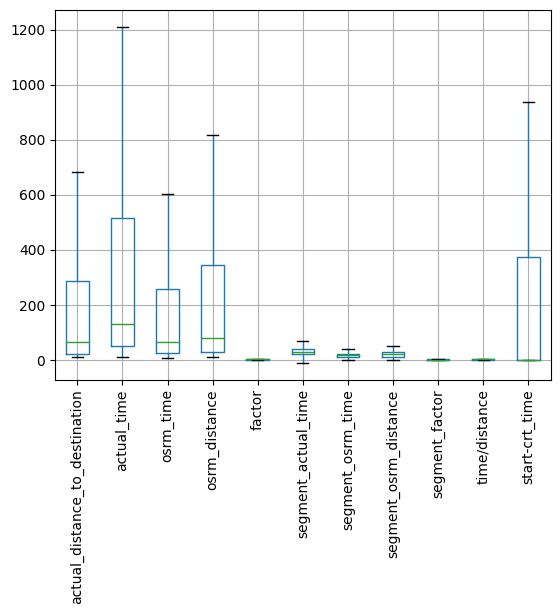

In [ ]:
df[outlier_cols].boxplot()
plt.xticks(rotation=90)
plt.show()

**Encoding categorical columns:**

In [ ]:
cat_cols = df.columns[df.dtypes == 'object']


In [ ]:
from sklearn import preprocessing

In [ ]:
labelencoder = preprocessing.LabelEncoder()
df['dest_city'] = labelencoder.fit_transform(df['dest_city'])

In [ ]:
df['dest_city']

0         598
1         598
2         598
3         598
4         598
         ... 
144862    418
144863    418
144864    418
144865    418
144866    418
Name: dest_city, Length: 144606, dtype: int64

In [ ]:
cat_cols = ['data', 'route_type', 'source_city', 'source_place', 'source_code',
       'source_State', 'dest_place', 'dest_code', 'dest_state']

In [ ]:
for col in cat_cols:
  df[col] = labelencoder.fit_transform(df[col])

In [ ]:
df['is_cutoff'] = labelencoder.fit_transform(df['is_cutoff'])

**Data after encoding of categorical columns:**

In [ ]:
df

,data,route_type,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,source_State,dest_city,dest_place,dest_code,dest_state,trip_crt_day,trip_crt_month,trip_crt_year,trip_crt_hour,time/distance,start-crt_time,trip_crt_mnt
0,1,0,86.0,1,9,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,38,1083,3,9,598,637,2,9,20,9,2018,2,1.341554,45.9,35
1,1,0,86.0,1,18,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,38,1083,3,9,598,637,2,9,20,9,2018,2,1.267371,45.9,35
2,1,0,86.0,1,27,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,38,1083,3,9,598,637,2,9,20,9,2018,2,1.447320,45.9,35
3,1,0,86.0,1,36,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,38,1083,3,9,598,637,2,9,20,9,2018,2,1.716594,45.9,35
4,1,0,86.0,0,39,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,38,1083,3,9,598,637,2,9,20,9,2018,2,1.726500,45.9,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,1,0,427.0,1,45,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000,1131,542,22,10,418,123,22,10,20,9,2018,16,2.076968,0.0,24
144863,1,0,427.0,1,54,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095,1131,542,22,10,418,123,22,10,20,9,2018,16,2.218421,0.0,24
144864,1,0,427.0,1,63,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235,1131,542,22,10,418,123,22,10,20,9,2018,16,2.115967,0.0,24
144865,1,0,427.0,1,72,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630,1131,542,22,10,418,123,22,10,20,9,2018,16,2.144389,0.0,24


**Column Standardization:**

In [ ]:
from sklearn.preprocessing import StandardScaler

**Data after standardizing and ready for machine learning:**

In [ ]:
scaler = StandardScaler()
std_df = scaler.fit_transform(df)
std_df = pd.DataFrame(std_df,columns=df.columns)
std_df

,data,route_type,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_place,source_code,source_State,dest_city,dest_place,dest_code,dest_state,trip_crt_day,trip_crt_month,trip_crt_year,trip_crt_hour,time/distance,start-crt_time,trip_crt_mnt
0,0.616751,-1.483249,-0.844758,0.468696,-0.650028,-0.768844,-0.810906,-0.792904,-0.777692,-1.258940,-1.002469,-0.726466,-0.886083,-0.707112,-1.358051,1.785164,-1.347939,-0.927557,0.259670,0.465597,-1.457314,-0.959979,0.204899,-0.370474,0.0,-1.340018,-1.006643,-0.550034,0.308106
1,0.616751,-1.483249,-0.844758,0.468696,-0.623939,-0.732742,-0.786440,-0.749373,-0.743084,-1.393640,-1.232691,-0.949479,-1.080871,-0.903466,-1.358051,1.785164,-1.347939,-0.927557,0.259670,0.465597,-1.457314,-0.959979,0.204899,-0.370474,0.0,-1.340018,-1.126290,-0.550034,0.308106
2,0.616751,-1.483249,-0.844758,0.468696,-0.597850,-0.695795,-0.747294,-0.710678,-0.704730,-0.970297,-0.887358,-1.172493,-0.987622,0.523603,-1.358051,1.785164,-1.347939,-0.927557,0.259670,0.465597,-1.457314,-0.959979,0.204899,-0.370474,0.0,-1.340018,-0.836057,-0.550034,0.308106
3,0.616751,-1.483249,-0.844758,0.468696,-0.571762,-0.659780,-0.693468,-0.652637,-0.658548,-0.745396,-0.599581,-0.614959,-0.792754,-0.127256,-1.358051,1.785164,-1.347939,-0.927557,0.259670,0.465597,-1.457314,-0.959979,0.204899,-0.370474,0.0,-1.340018,-0.401758,-0.550034,0.308106
4,0.616751,-1.483249,-0.844758,-2.133579,-0.563066,-0.645902,-0.678788,-0.633290,-0.627851,-0.753815,-1.462913,-1.395506,-1.596796,-0.795471,-1.358051,1.785164,-1.347939,-0.927557,0.259670,0.465597,-1.457314,-0.959979,0.204899,-0.370474,0.0,-1.340018,-0.385781,-0.550034,0.308106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144601,0.616751,-1.483249,-0.516072,0.468696,-0.545673,-0.620964,-0.615176,-0.555901,-0.579232,-0.714528,-1.117580,-0.614959,-1.219765,-1.038459,1.827646,0.171179,0.054095,-0.813693,-0.255219,-1.098051,0.035609,-0.850019,0.204899,-0.370474,0.0,0.420760,0.179473,-0.696952,-0.318293
144602,0.616751,-1.483249,-0.516072,0.468696,-0.519585,-0.583448,-0.551563,-0.478512,-0.516268,-0.691782,-0.311804,0.388601,-0.408695,-0.749188,1.827646,0.171179,0.054095,-0.813693,-0.255219,-1.098051,0.035609,-0.850019,0.204899,-0.370474,0.0,0.420760,0.407615,-0.696952,-0.318293
144603,0.616751,-1.483249,-0.516072,0.468696,-0.493496,-0.532187,-0.502631,-0.420470,-0.475803,-0.669628,-0.657137,1.838189,-0.114451,-1.538727,1.827646,0.171179,0.054095,-0.813693,-0.255219,-1.098051,0.035609,-0.850019,0.204899,-0.370474,0.0,0.420760,0.242373,-0.696952,-0.318293
144604,0.616751,-1.483249,-0.516072,0.468696,-0.467408,-0.500264,-0.458591,-0.372102,-0.425525,-0.630111,-0.829803,1.057642,-0.274851,-1.488436,1.827646,0.171179,0.054095,-0.813693,-0.255219,-1.098051,0.035609,-0.850019,0.204899,-0.370474,0.0,0.420760,0.288213,-0.696952,-0.318293


**Business Insights:**



*   Busiest place for inter-state orders is Haryana
*   Busiest places for local orders are Maharashtra and Karnataka
*   Busiest city is Gurgaon
*   There is a significant difference between osrm time and actual time



**Recommendations:**


*   Identify obstacles that is delaying the delivery more than predicted time
*   Prepare the infrastructure by identifying whether delivery will outside state or not

